In [48]:
# from census import Census
# from us import states

import requests
import pandas as pd
import numpy as np

from __future__ import print_function, division
import matplotlib.pylab as pl
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
sns.set_style('whitegrid')
import json
import geopandas as gpd
import fiona
import shapely

import statsmodels.formula.api as smf
import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Data (shapefiles)
- CSAs
- Counties within CSA's
- Places (main cities) within CSA's

### CSA's

In [49]:
CSAs = gpd.GeoDataFrame.from_file('../rp-USmetros_comparison/data/MajorMetro_CSAs_NYC Metro/MajorMetro_CSAs_NYC Metro.shp')

CSAs['CSA_short'] = CSAs['NAMELSAD'].str.split('-').str[0]
CSAs['CSA_short'] = CSAs['CSA_short'].replace(['San Jose'], ['SFSJ']) 

CSAs = CSAs.set_index('GEOID')

print(CSAs.shape)
print(CSAs.crs)
CSAs.head()

(15, 12)
{'init': 'epsg:4269'}


,NAMELSAD,LSAD,ALAND,AWATER,INTPTLAT,INTPTLON,OBJECTID,Shape_Leng,Shape_Area,ALAND_mi,geometry,CSA_short
GEOID,,,,,,,,,,,,
122,"Atlanta--Athens-Clarke County--Sandy Springs, ...",M0,3.067861e+10,6.259976e+08,+33.7367725,-84.3069871,6,10.252350,3.045510,11845.07402,POLYGON ((-84.65452299973663 34.58318700008004...,Atlanta
148,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",M0,2.512644e+10,7.172326e+09,+42.3619187,-71.2724983,13,19.477631,2.899277,9701.36925,(POLYGON ((-71.57030099989117 41.2253420000333...,Boston
176,"Chicago-Naperville, IL-IN-WI CSA",M0,2.754528e+10,6.298296e+09,+41.6992296,-88.0040867,23,11.095250,3.016180,10635.28824,POLYGON ((-87.80585589123638 42.66788896010746...,Chicago
206,"Dallas-Fort Worth, TX-OK CSA",M0,4.269566e+10,1.772163e+09,+32.9421299,-96.8323426,34,14.767164,4.287351,16484.87986,POLYGON ((-95.44916499996475 32.35523300050261...,Dallas
216,"Denver-Aurora, CO CSA",M0,3.382046e+10,2.636014e+08,+39.8155108,-104.7708866,37,12.049017,3.585039,13058.14675,POLYGON ((-105.3291339998342 38.69720499981094...,Denver


In [50]:
list(CSAs.CSA_short)

['Atlanta',
 'Boston',
 'Chicago',
 'Dallas',
 'Denver',
 'Detroit',
 'Houston',
 'Los Angeles',
 'Miami',
 'Minneapolis',
 'Philadelphia',
 'SFSJ',
 'Seattle',
 'Washington',
 'NYC Metropolitan Region (DCP']

### Counties

In [68]:
Counties = gpd.GeoDataFrame.from_file('../rp-USmetros_comparison/data/MM_County_CSA-NYMetro/MM_County_CSA-NYMetro.shp')

Counties['STATEFP'] = Counties['STATEFP'].apply(lambda x: '{0:0>2}'.format(x))
Counties['COUNTYFP'] = Counties['COUNTYFP'].apply(lambda x: '{0:0>3}'.format(x))
Counties['STCO'] = Counties[['STATEFP', 'COUNTYFP']].apply(lambda x: ''.join(x), axis=1)

print(Counties.shape)
print(Counties.crs)
Counties.head()

(275, 24)
{'init': 'epsg:4269'}


,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,CSA,ALAND_mi,geometry,STCO
0,50,51,179,01480173,51179,Stafford,Stafford County,06,H1,G4020,...,6.972372e+08,28088013.0,+38.4153998,-077.4548785,1.430305,0.074492,548,269.20469,POLYGON ((-77.29936158217123 38.51150278002933...,51179
1,52,18,073,00450494,18073,Jasper,Jasper County,06,H1,G4020,...,1.449423e+09,4569484.0,+41.0176883,-087.1188137,1.712039,0.155669,176,559.62509,POLYGON ((-86.93007900014572 41.23679800042743...,18073
2,54,13,171,00326713,13171,Lamar,Lamar County,06,H1,G4020,...,4.752628e+08,6046030.0,+33.0744605,-084.1467208,1.012445,0.046478,122,183.49991,"POLYGON ((-84.04149800013255 33.2026290001283,...",13171
3,62,25,025,00606939,25025,Suffolk,Suffolk County,06,H4,G4020,...,1.508555e+08,160479920.0,+42.3385513,-071.0182530,1.473513,0.018754,148,58.24560,"(POLYGON ((-70.954286600746 42.30865283436088,...",25025
4,69,48,147,01383859,48147,Fannin,Fannin County,06,H1,G4020,...,2.307251e+09,20847063.0,+33.5911611,-096.1049882,2.281024,0.226131,206,890.83420,"POLYGON ((-95.8465360002362 33.83985499970851,...",48147


In [69]:
list(Counties.columns)

['OBJECTID',
 'STATEFP',
 'COUNTYFP',
 'COUNTYNS',
 'GEOID',
 'NAME',
 'NAMELSAD',
 'LSAD',
 'CLASSFP',
 'MTFCC',
 'CSAFP',
 'CBSAFP',
 'METDIVFP',
 'FUNCSTAT',
 'ALAND',
 'AWATER',
 'INTPTLAT',
 'INTPTLON',
 'Shape_Leng',
 'Shape_Area',
 'CSA',
 'ALAND_mi',
 'geometry',
 'STCO']

In [57]:
print(len(Counties[Counties['CSA'] == '408']))
Counties[Counties['CSA'] == '408'].set_index('NAME')

31


,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,CSA,ALAND_mi,geometry
NAME,,,,,,,,,,,,,,,,,,,,,
Sussex,112,34,037,00882236,34037,Sussex County,06,H1,G4020,408,...,A,1.343553e+09,4.323473e+07,+41.1374609,-074.6919141,1.685312,0.148732,408,518.74848,POLYGON ((-74.36751000048611 41.20324099977239...
Ulster,212,36,111,00974153,36111,Ulster County,06,H1,G4020,408,...,A,2.911758e+09,9.459695e+07,+41.9472124,-074.2654582,2.938621,0.326126,408,1124.23551,POLYGON ((-73.91067500005119 42.12729300007197...
Suffolk,445,36,103,00974149,36103,Suffolk County,06,H1,G4020,408,...,A,2.360846e+09,3.785547e+09,+40.9435540,-072.6922184,5.113171,0.319009,408,911.52747,(POLYGON ((-72.08116699995702 41.0939400000310...
Union,477,34,039,00882235,34039,Union County,06,H1,G4020,408,...,A,2.661707e+08,7.046286e+06,+40.6598707,-074.3086957,1.040074,0.029008,408,102.76902,POLYGON ((-74.13670300024324 40.67444400019053...
Dutchess,545,36,027,00974112,36027,Dutchess County,06,H1,G4020,408,...,A,2.060678e+09,7.695628e+07,+41.7547699,-073.7400411,2.225778,0.231450,408,795.63197,POLYGON ((-73.49701799968091 42.04962400034736...
Nassau,1016,36,059,00974128,36059,Nassau County,06,H1,G4020,408,...,A,7.371910e+08,4.372827e+08,+40.7296118,-073.5894144,1.889345,0.087078,408,284.63094,(POLYGON ((-73.47987599967763 40.9011190005414...
Middlesex,1038,34,023,00882230,34023,Middlesex County,06,H1,G4020,408,...,A,8.008576e+08,3.547265e+07,+40.4396214,-074.4074303,1.591035,0.087240,408,309.21272,(POLYGON ((-74.22295928084611 40.4524984193666...
Westchester,1134,36,119,00974157,36119,Westchester County,06,H1,G4020,408,...,A,1.115031e+09,1.799491e+08,+41.1527698,-073.7459120,1.928955,0.132591,408,430.51583,(POLYGON ((-73.76744100030186 40.8806869999051...
New Haven,1139,09,009,00212798,09009,New Haven County,06,H4,G4020,408,...,N,1.565654e+09,6.670923e+08,+41.3497173,-072.9002037,2.894221,0.173293,408,604.50204,(POLYGON ((-72.74029899979894 41.2564540003518...


In [70]:
Counties_df = Counties[['STCO', 'NAMELSAD', 'CSA']]

print(Counties_df.shape)
Counties_df.head()

(275, 3)


,STCO,NAMELSAD,CSA
0,51179,Stafford County,548
1,18073,Jasper County,176
2,13171,Lamar County,122
3,25025,Suffolk County,148
4,48147,Fannin County,206


In [71]:
# exporting as .csv 
Counties_df.to_csv("exports/USmetros_COUNTIESraw.csv")

### Places

In [59]:
Places = gpd.GeoDataFrame.from_file('../rp-USmetros_comparison/data/MM_Places_City/MM_Places_City_clip.shp')

print(Places.shape)
print(Places.crs)
Places.head()

(19, 19)
{'init': 'epsg:4269'}


,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,CSA,ALAND_mi,geometry
0,06,44000,02410877,0644000,Los Angeles,Los Angeles city,25,C1,Y,N,G4110,A,1213820883,88227535,+34.0193936,-118.4108248,348,468.65867,"POLYGON ((-118.440514 34.32991800000003, -118...."
1,06,68000,02411790,0668000,San Jose,San Jose city,25,C1,Y,N,G4110,A,459759588,7803332,+37.2967394,-121.8189089,488,177.51410,"(POLYGON ((-121.823706 37.207211, -121.823697 ..."
2,06,67000,02411786,0667000,San Francisco,San Francisco city,25,C1,Y,N,G4110,A,121485107,479107241,+37.7272391,-123.0322294,488,46.90564,(POLYGON ((-123.0008930003117 37.7010110001575...
3,06,53000,02411292,0653000,Oakland,Oakland city,25,C1,Y,N,G4110,A,144770150,56958798,+37.7698464,-122.2256900,488,55.89604,POLYGON ((-122.2424299999999 37.88220299999999...
4,08,20000,02410324,0820000,Denver,Denver city,25,C1,Y,N,G4110,A,397057845,4236701,+39.7618502,-104.8811054,216,153.30483,"(POLYGON ((-104.931668 39.69917400000004, -104..."


In [60]:
# how many counties are in a CSA?
Counties_CSAs = Counties.groupby(['CSA']).count().reset_index().set_index('CSA')
Counties_CSAs = Counties_CSAs.iloc[1:,:1]
Counties_CSAs.columns = ['numberCounties']

print(list(Counties_CSAs.index))
print(Counties_CSAs.shape)
Counties_CSAs

['122', '148', '176', '206', '216', '220', '288', '348', '370', '378', '408', '428', '488', '500', '548']
(15, 1)


,numberCounties
CSA,
122,39
148,19
176,19
206,20
216,12
220,10
288,14
348,5
370,7


In [61]:
Counties_CSAs.merge(CSAs.iloc[:,-1:], left_index=True, right_index=True)

,numberCounties,CSA_short
122,39,Atlanta
148,19,Boston
176,19,Chicago
206,20,Dallas
216,12,Denver
220,10,Detroit
288,14,Houston
348,5,Los Angeles
370,7,Miami
378,21,Minneapolis


In [62]:
# exporting as .csv 
Places.to_csv("exports/USmetros_Placesraw.csv")

# Plotting

(-126.21379210006532,
 -67.24813589951212,
 23.962123350447307,
 49.832949650071335)

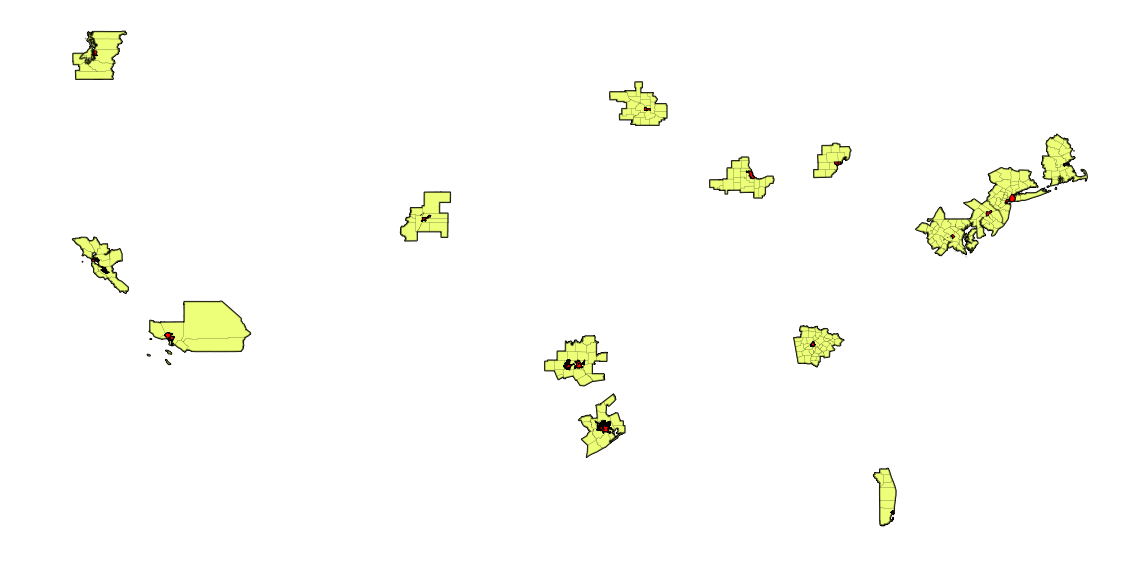

In [63]:
fig = pl.figure(figsize=(20,10))
ax = fig.add_subplot(111)

CSAs.plot(ax=ax, color='#EDFF78', edgecolor='k',linewidth=1.5);
Counties.plot(ax=ax, color='#EDFF78', edgecolor='k',linewidth=.2, alpha=0.6);
Places.plot(ax=ax, color='r', edgecolor='k',linewidth=.8);

ax.axis('off')

In [64]:
CSAs_sorted = ['500','216', '220','378','148',
               '488','176',  '122','548','408',
               '348', '206', '288', '428', '370']

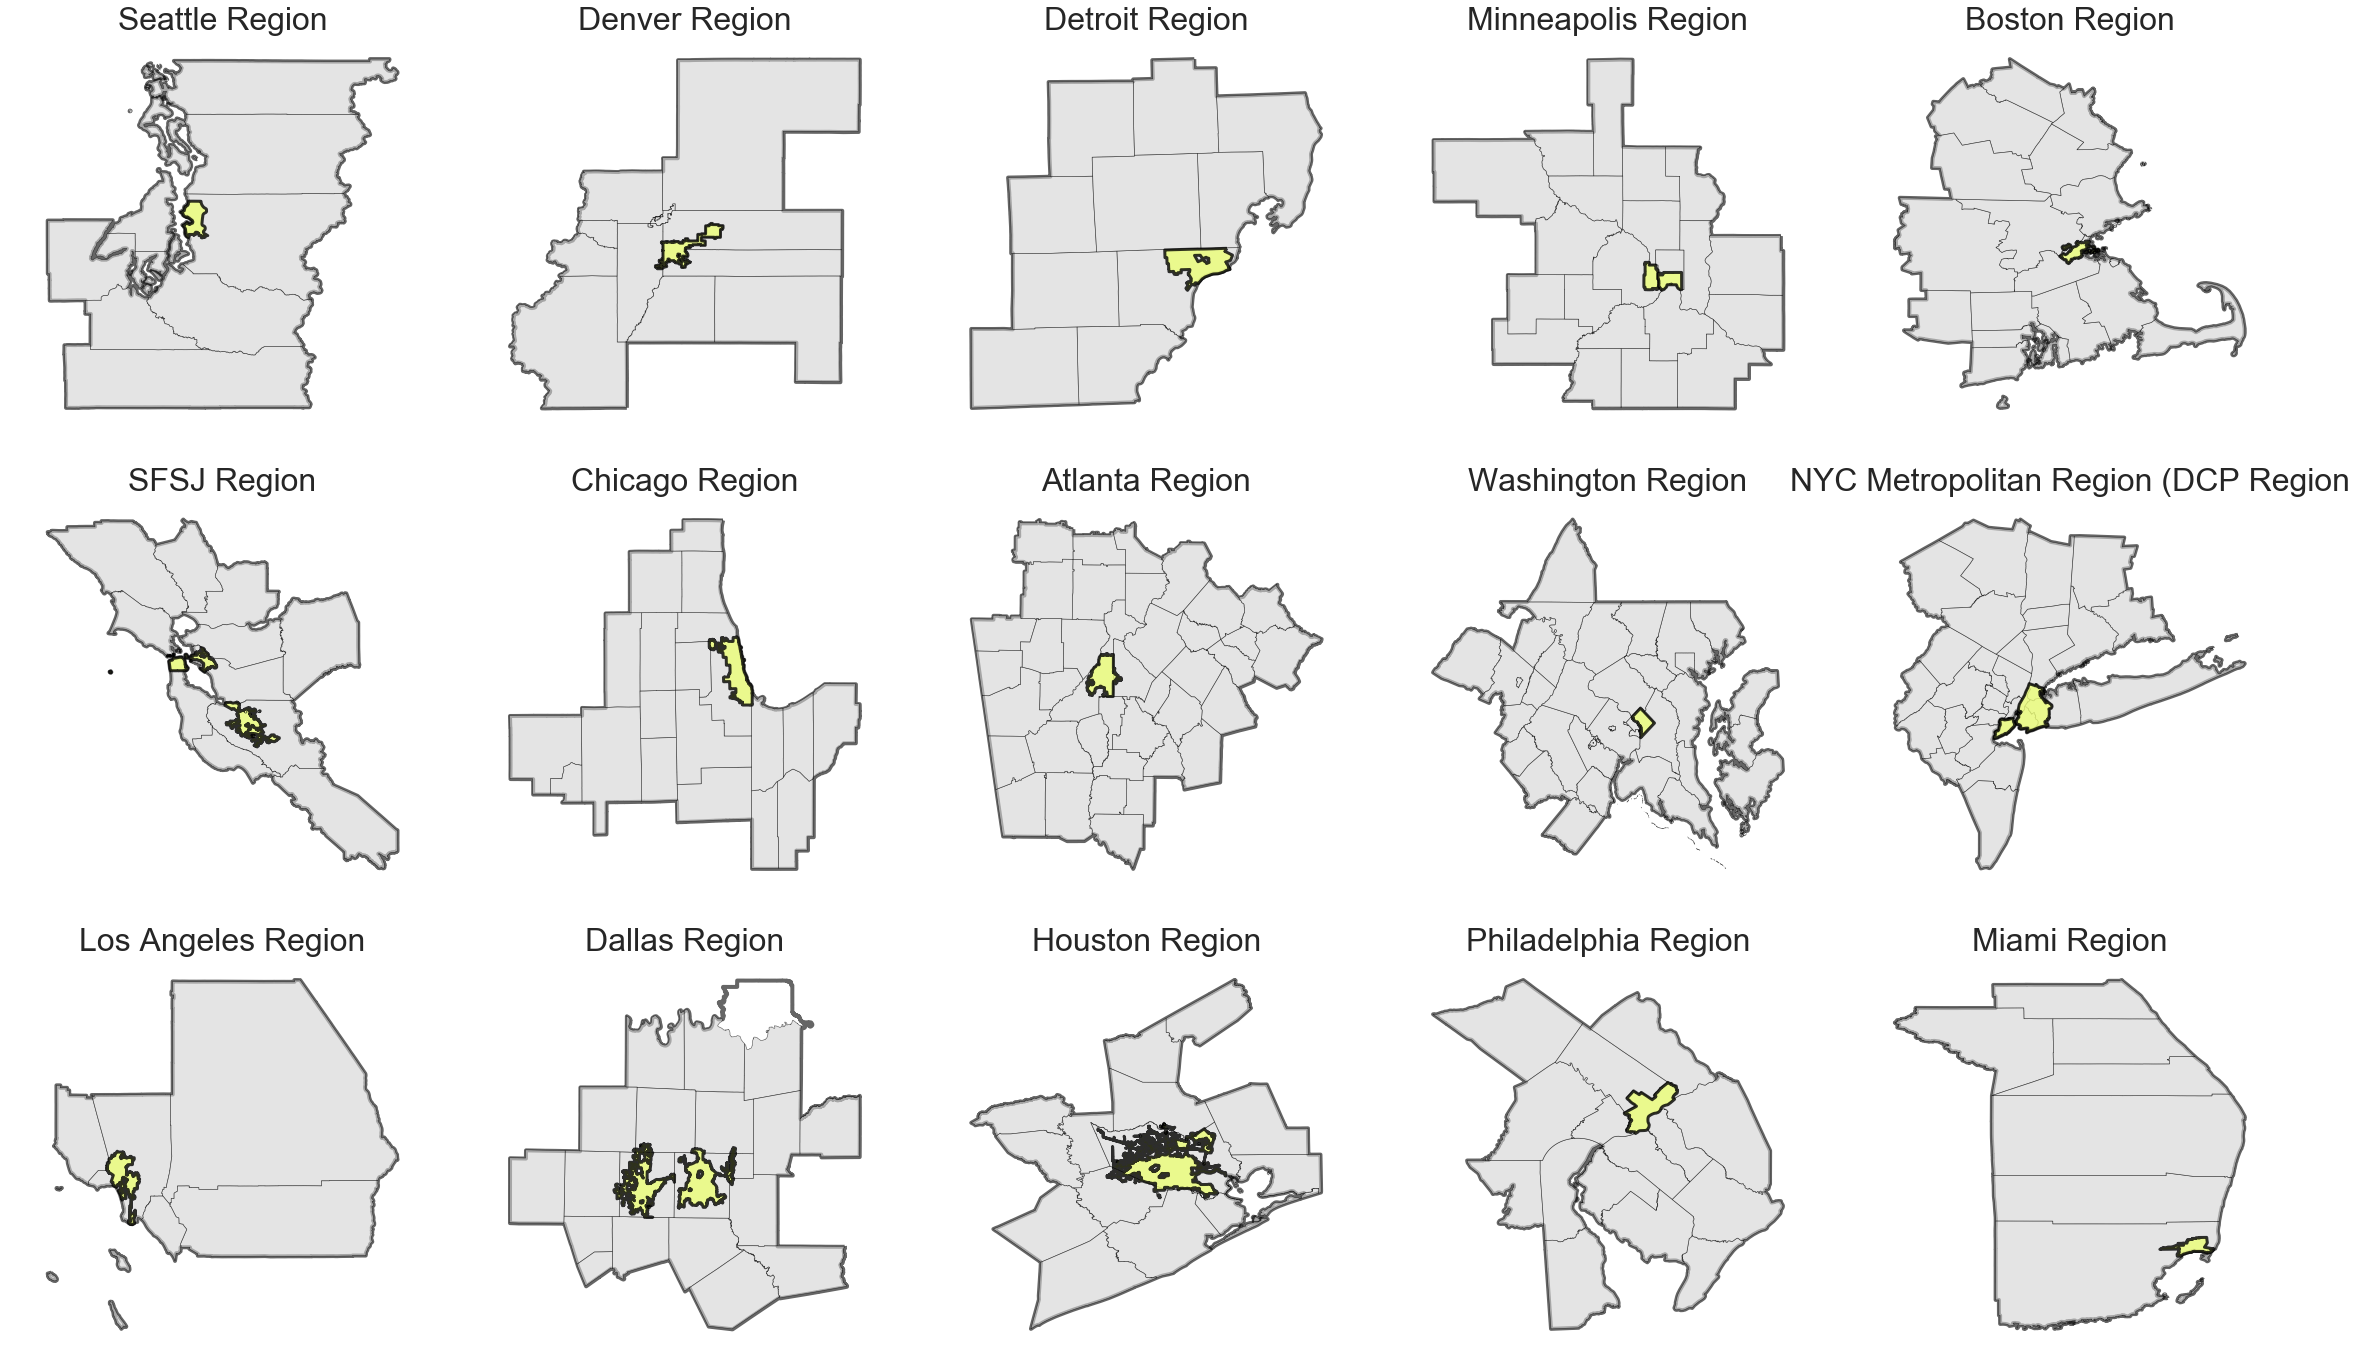

In [65]:
fig = pl.figure(figsize=(40,24))
sns.set_style("whitegrid")
vmin, vmax = 0, 4000

# 15 choroplets of 15 major metros
for k in range(len(CSAs_sorted)):
    ax = fig.add_subplot(3,5,k+1)
    CSAs[CSAs.index == CSAs_sorted[k]].plot(ax=ax, color='w', edgecolor='k',linewidth=4, alpha=0.6);
    Counties[Counties['CSA'] == CSAs_sorted[k]].plot(ax=ax, color='lightgrey', edgecolor='k',linewidth=.6, alpha=0.6);
    Places[Places['CSA'] == CSAs_sorted[k]].plot(ax=ax, color='#EDFF78', edgecolor='k',linewidth=3, alpha=0.8);

    ax.set_title('{} Region'.format(CSAs['CSA_short'][CSAs_sorted[k]]), fontsize=32, y=1.015)
    ax.grid(linewidth=0.25)
    ax.axis('off')
    
plt.savefig("geographies.pdf", transparent=True)